![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face recognition
Task is to recognize a faces

### Dataset
**Aligned Face Dataset from Pinterest**

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and      aligned using dlib library.

In [2]:
import tensorflow
tensorflow.__version__

'2.3.0'

In [3]:
# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

#### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Change current working directory to project folder (2 marks)

In [5]:
import os
os.chdir('/content/drive/My Drive/FaceRecognition Project_Nileena')


In [6]:
os.getcwd()

'/content/drive/My Drive/FaceRecognition Project_Nileena'

### Extract the zip file (3 marks)
- Extract Aligned Face Dataset from Pinterest.zip

In [15]:
!apt install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


In [16]:
import zipfile
with zipfile.ZipFile('Aligned Face Dataset from Pinterest.zip',"r") as zip_ref:
    zip_ref.extractall("/content/drive/My Drive/FaceRecognition Project_Nileena/ZipExtracts")

In [11]:
!unzip -q '/content/drive/My Drive/FaceRecognition Project_Nileena/Aligned Face Dataset from Pinterest.zip'

### Function to load images
- Define a function to load the images from the extracted folder and map each image with person id 

In [306]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS')

### Define function to load image
- Define a function to load image from the metadata

In [123]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

Load a sample image (3 marks)
•Load one image using the function "load_image"


In [124]:
metadata[0]

PINS/pins_Aaron Paul/Aaron Paul0_262.jpg

In [125]:
import numpy as np
import os.path
sample_image=load_image(metadata[0].image_path())
sample_image

array([[[233, 188, 165],
        [231, 186, 163],
        [220, 178, 156],
        ...,
        [106,  63,  72],
        [106,  63,  72],
        [106,  63,  72]],

       [[232, 187, 164],
        [233, 188, 165],
        [220, 178, 156],
        ...,
        [106,  63,  72],
        [106,  63,  72],
        [106,  63,  72]],

       [[230, 186, 161],
        [228, 184, 159],
        [206, 164, 140],
        ...,
        [106,  63,  72],
        [106,  63,  72],
        [106,  63,  72]],

       ...,

       [[198, 118,  91],
        [197, 120,  94],
        [195, 119,  95],
        ...,
        [ 78,  66,  76],
        [ 78,  66,  76],
        [ 78,  66,  76]],

       [[200, 120,  93],
        [200, 120,  93],
        [198, 121,  95],
        ...,
        [ 78,  66,  76],
        [ 78,  66,  76],
        [ 78,  66,  76]],

       [[201, 121,  94],
        [201, 121,  94],
        [199, 122,  96],
        ...,
        [ 78,  66,  76],
        [ 78,  66,  76],
        [ 78,  66,  76]]

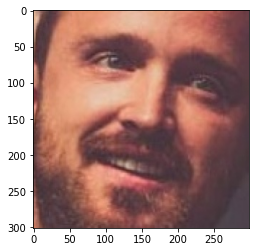

In [126]:
import matplotlib.pyplot as plt
plt.imshow(sample_image)

### VGG Face model
- Here we are giving you the predefined model for VGG face

In [127]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

#### Load the model (3 marks)
- Load the model defined above
- Then load the given weight file named "vgg_face_weights.h5"

In [195]:
model=vgg_face()


In [196]:
from keras.models import model_from_json
model.load_weights('vgg_face_weights.h5')

Get vgg_face_descriptor

In [197]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

Generate embeddings for each image in the dataset

•Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model.


In [307]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


### Generate embeddings for all images (8 marks)
- Write code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [132]:
import numpy as np

In [308]:
embeddings = np.zeros((metadata.shape[0], 2622))

for i,m in enumerate(metadata):
  image=load_image(m.image_path())
  img = (image / 255.).astype(np.float32)
  img = cv2.resize(img, dsize = (224,224))
  embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
  embeddings[i]=embedding_vector

### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [309]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

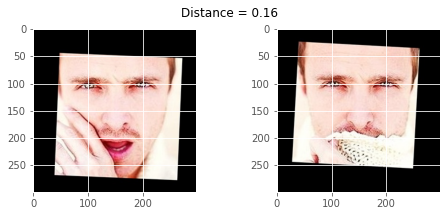

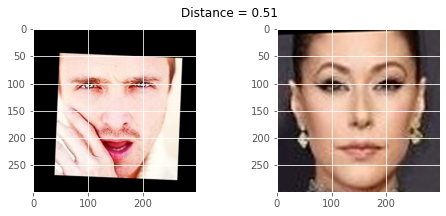

In [310]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)

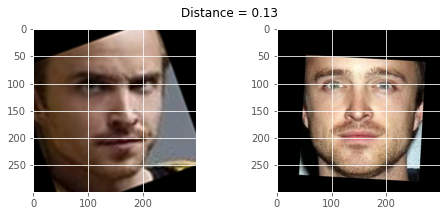

In [311]:
show_pair(30,31)

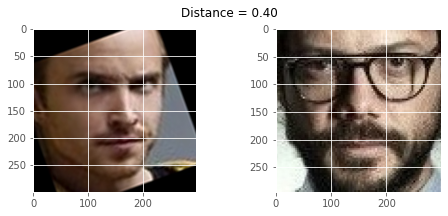

In [312]:
show_pair(30,100)

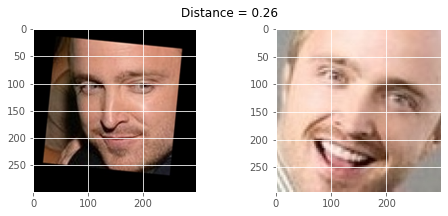

In [313]:
show_pair(70,72)

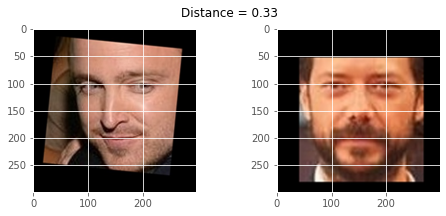

In [314]:
show_pair(70,115)

### Create train and test sets (8 marks)
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [315]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0     #every 9th example goes in test data and rest go in train data
test_idx = np.arange(metadata.shape[0]) % 9 == 0
# one half as train examples of 10 identities
X_train = embeddings[train_idx]

In [316]:
# another half as test examples of 10 identities
X_test=embeddings[test_idx]

In [317]:
import keras
targets = np.array([m.name for m in metadata])
#train labels
y_train = targets[train_idx]
#test labels
y_test=targets[test_idx]

In [318]:
## checking the shapes of metaadata and test and train sets
print(metadata.shape)
print(train_idx.shape)
print(test_idx.shape)

(10770,)
(10770,)
(10770,)


In [331]:
print(X_train.shape)
print(X_test.shape)

(9573, 2622)
(1197, 2622)


In [320]:
print(y_train.shape)
print(y_test.shape)

(9573,)
(1197,)


### Encode the Labels (4 marks)
- Encode the targets
- Use LabelEncoder

(10770,)
(10770,)
(10770,)
SVM accuracy =  0.9682539682539683


Text(0.5, 1.0, 'Identified as :pins_Amaury Nolasco')

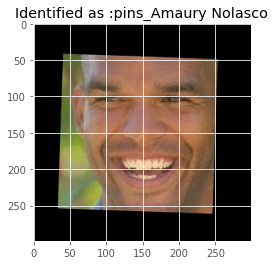

In [330]:
from sklearn.metrics import f1_score, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
encoder = LabelEncoder()
encoder.fit(targets)
# Numerical encoding of identities
y = encoder.transform(targets)

## checking the shapes of metaadata and test and train sets
print(metadata.shape)
print(train_idx.shape)
print(test_idx.shape)


# one half as train examples of 10 identities
X_train = embeddings[train_idx]
# another half as test examples of 10 identities
X_test = embeddings[test_idx]

y_train = y[train_idx]
y_test = y[test_idx]

svc = LinearSVC()

svc.fit(X_train, y_train)

acc_svc = accuracy_score(y_test, svc.predict(X_test))

print('SVM accuracy = ', acc_svc)

example_idx = 44

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = svc.predict([embeddings[test_idx][example_idx]])
example_identity = encoder.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title('Identified as :' + str(example_identity))

### Standardize the feature values (4 marks)
- Scale the features using StandardScaler

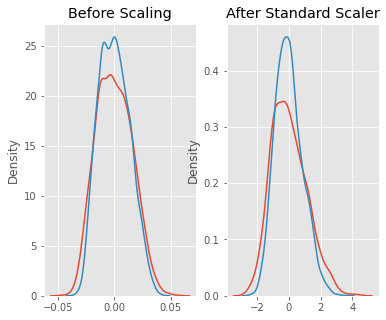

In [322]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(embeddings)
df=embeddings
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(df[0], ax=ax1)
sns.kdeplot(df[1], ax=ax1)

ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_df[0], ax=ax2)
sns.kdeplot(scaled_df[1], ax=ax2)

plt.show()

### Reduce dimensions using PCA (4 marks)
- Reduce feature dimensions using Principal Component Analysis
- Set the parameter n_components=128

In [323]:
# Import matplotlib library 
import matplotlib.pyplot as plt 
# Import scikit-learn library 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV 
from sklearn.datasets import fetch_lfw_people 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.decomposition import PCA 
from sklearn.svm import SVC 
import numpy as np 
from time import time
import logging

In [324]:
n_components = 128

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))


print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca= pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("done in %0.3fs" % (time() - t0))


Extracting the top 128 eigenfaces from 9573 faces
done in 4.532s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.328s


### Build a Classifier (4 marks)
- Use SVM Classifier to predict the person in the given image
- Fit the classifier and print the score

SVM accuracy =  0.9682539682539683


Text(0.5, 1.0, 'Identified as :pins_Benedict Cumberbatch')

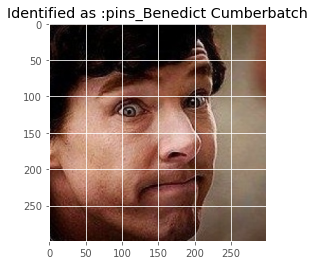

In [332]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
encoder = LabelEncoder()
encoder.fit(targets)
# Numerical encoding of identities
y = encoder.transform(targets)
svc = LinearSVC()
svc.fit(X_train, y_train)
acc_svc = accuracy_score(y_test, svc.predict(X_test))
print('SVM accuracy = ', acc_svc)

example_idx = 56

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = svc.predict([embeddings[test_idx][example_idx]])
example_identity = encoder.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title('Identified as :' + str(example_identity))

### Test results (2 mark)
- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

Text(0.5, 1.0, 'Identified as :pins_Alvaro Morte')

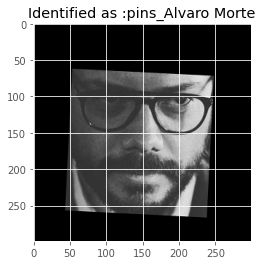

In [333]:
example_idx = 10

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = svc.predict([embeddings[test_idx][example_idx]])
example_identity = encoder.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title('Identified as :' + str(example_identity))